# Multiple Regression models 

in this nootebook, we gonne build a multiple Regression models to just choose the best estimator for our problem

we gonne Define Helper Functions to build, train and evaluate Multiple Regression models

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from  sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression ,Lasso, Ridge, ElasticNet, Lars, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')



In [2]:
automobile_df= pd.read_csv('datasets/auto-mpg-processed.csv')
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,23.0,4,120.0,97,2506,14.5,52
1,26.0,4,121.0,113,2234,12.5,54
2,15.0,8,400.0,150,3761,9.5,54
3,25.4,6,168.0,116,2900,12.6,43
4,19.0,6,250.0,88,3302,15.5,53


## Identifying Our Helper Functions

In [3]:
result_dict= {}

In [4]:
def preprocess_fn(x):
    scaller= MinMaxScaler()
    x.values.reshape(-1,1)
    return scaller.fit_transform(x)

In [5]:
def build_models(regression_fn,
                  name_of_y_col,
                  names_of_x_cols,
                  dataset,
                  test_frac=0.2,
                  preprocess_fn=None,
                  show_plot_y=False,
                  show_plot_scatter=False):
    
    """
    regression_fn : This is the function that takes in a training data and corresponding target values, will init a particular ML Regression model
    name_of_y_col : Specify the column name in our data frame for the target values that we should use for training  .
    names_of_x_cols : list of feature columns .
    dataset : Original dataframe that contains the features and the target values .
    test_frac : specify now much of our dataset we should hold out to evaluate our model.
    preprocess_fn :
    show_plot_y : <bool> plot the Actual values vs predicted values in the form of a line chart, the defalut value is False.
    show_plot_scatter: <bool> display a scatter plot with the Original X and Y values of the test data and the perdicted line, the defalut value is False
    """
    X= dataset[names_of_x_cols]
    Y= dataset[name_of_y_col]
    
    if preprocess_fn is not None:
        X= preprocess_fn(X)
    
    x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=test_frac)

    model= regression_fn(x_train,y_train)

    y_pred= model.predict(x_test)

    print(f"Training Score : {model.score(x_train,y_train)}")
   
    print(f"Testing Score : {r2_score(y_test,y_pred)}")

    if show_plot_y == True:
        fig, ax= plt.subplots(figsize=(12,6))
        plt.plot(y_pred,label='Predicated')
        plt.plot(y_test.values, label='Actual')
        plt.legend()
        plt.ylabel(name_of_y_col)
        plt.show()
    
    if show_plot_scatter == True:
        fig ,ax= plt.subplots(figsize=(12,6))

        plt.scatter(x_test,y_test)
        plt.plot(x_test,y_pred,'r')

        plt.legend(["Predicted Line","Observed data"])

        plt.show()
    return {
        "training score": model.score(x_train,y_train),

        "test score": r2_score(y_test,y_pred)
    }

In [6]:
def compare_results():
    """
    This is the function that will quickly print out the training and testing scores for all regression models 
    """
    for key in result_dict:
        print("Regression",key)
        print("Training Score",result_dict[key]['training score'])
        print("Testing Score",result_dict[key]['test score'])
        print()

## Testing our Helper functions

Training Score : 0.672181059745804
Testing Score : 0.7539773908755517


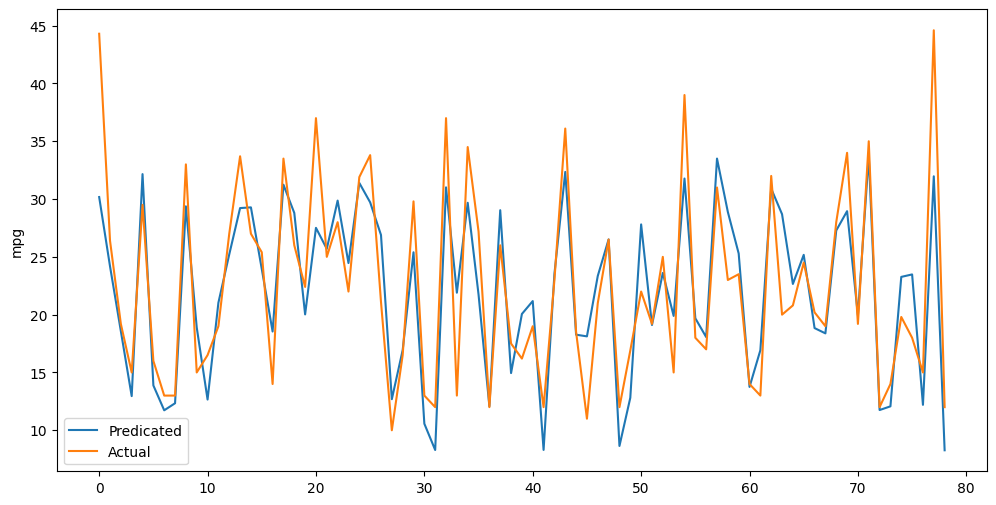

In [7]:
def linear_reg(x_train,y_train):
    return LinearRegression().fit(x_train,y_train)

result_dict['mpg - single linear']= build_models(linear_reg,
                                                 'mpg',
                                                 ['weight'],
                                                 automobile_df,
                                                
                                                 show_plot_y=True)

In [8]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,23.0,4,120.0,97,2506,14.5,52
1,26.0,4,121.0,113,2234,12.5,54
2,15.0,8,400.0,150,3761,9.5,54
3,25.4,6,168.0,116,2900,12.6,43
4,19.0,6,250.0,88,3302,15.5,53


Training Score : 0.7114834360429263
Testing Score : 0.6752249487259199


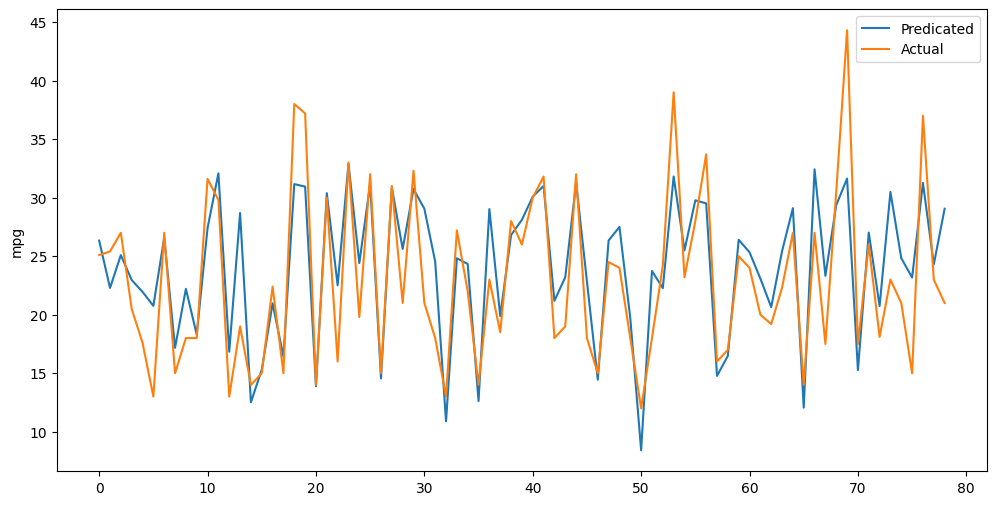

In [9]:
result_dict['mpg - kitchen sink linear']= build_models(linear_reg,
                                                       'mpg',
                                                       ['cylinders','displacement','horsepower','weight','acceleration'],
                                                       automobile_df,
                                                       preprocess_fn=preprocess_fn,
                                                       show_plot_y=True)

In [10]:
compare_results()

Regression mpg - single linear
Training Score 0.672181059745804
Testing Score 0.7539773908755517

Regression mpg - kitchen sink linear
Training Score 0.7114834360429263
Testing Score 0.6752249487259199



## Lasso Regression

The lasso Regression model uses l1 regularization to add a penalty to our loss function

In [11]:
def lasso_regression(x_train,y_train,alpha=0.5):
    return Lasso(alpha=alpha).fit(x_train,y_train)


Training Score : 0.6840978469481247
Testing Score : 0.7808457281678542


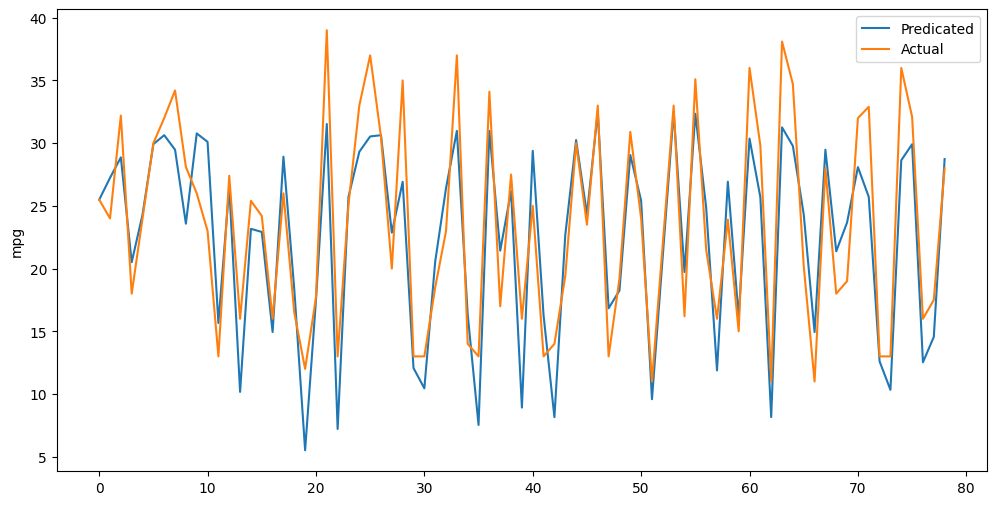

In [12]:
result_dict['mpg - kitchen sink lasso']= build_models(lasso_regression,'mpg',
                                                      ['cylinders','displacement','horsepower','weight','acceleration'],
                                                      automobile_df,
                                                      show_plot_y=True,
                                                      
                                                      )

In [13]:
compare_results()

Regression mpg - single linear
Training Score 0.672181059745804
Testing Score 0.7539773908755517

Regression mpg - kitchen sink linear
Training Score 0.7114834360429263
Testing Score 0.6752249487259199

Regression mpg - kitchen sink lasso
Training Score 0.6840978469481247
Testing Score 0.7808457281678542



## Ridge Regression

In [14]:
def ridge_regression(x_train, y_train, alpha=0.5):
    return Ridge(alpha=alpha).fit(x_train,y_train)

Training Score : 0.7116268537169443
Testing Score : 0.6888152170393079


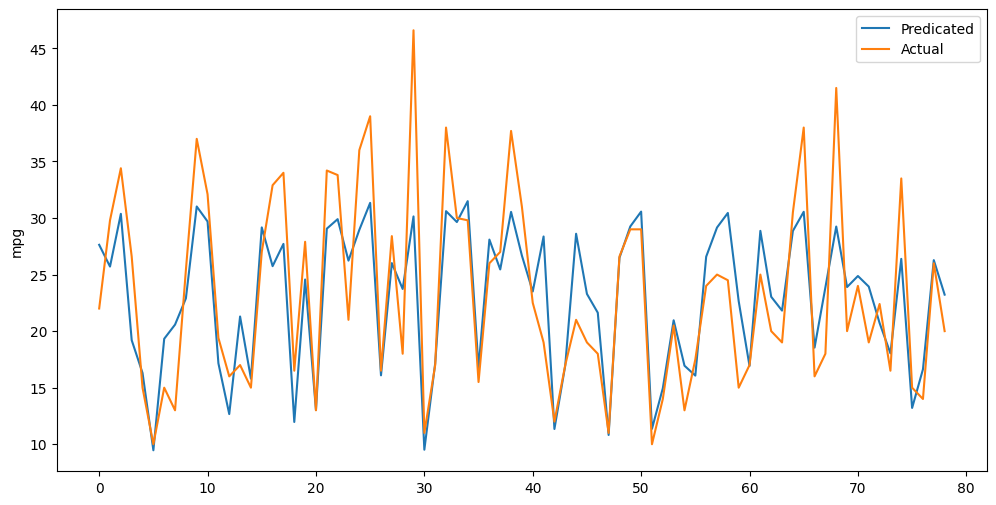

In [15]:
result_dict["mpg - kitchen sink Ridge"] = build_models(ridge_regression,
                                                       'mpg',
                                                         ['cylinders','displacement','horsepower','weight','acceleration'],
                                                        automobile_df,
                                                        show_plot_y=True,
                                                       )

In [16]:
compare_results()

Regression mpg - single linear
Training Score 0.672181059745804
Testing Score 0.7539773908755517

Regression mpg - kitchen sink linear
Training Score 0.7114834360429263
Testing Score 0.6752249487259199

Regression mpg - kitchen sink lasso
Training Score 0.6840978469481247
Testing Score 0.7808457281678542

Regression mpg - kitchen sink Ridge
Training Score 0.7116268537169443
Testing Score 0.6888152170393079



## Elastic Net Regression

In [17]:
def elastic_net_regression(x_train,y_train,alpha=1,l1_ratio=0.5,
                           max_iter=100000,warm_start=True,equivalent_to="Elastic Net"):
    print("Equivalent to ", equivalent_to)

    model= ElasticNet(alpha=alpha,l1_ratio=l1_ratio,max_iter=max_iter,warm_start=warm_start)
    model.fit(x_train,y_train)
    return model

Equivalent to  OLS
Training Score : 0.7063020223162144
Testing Score : 0.6793867258962282


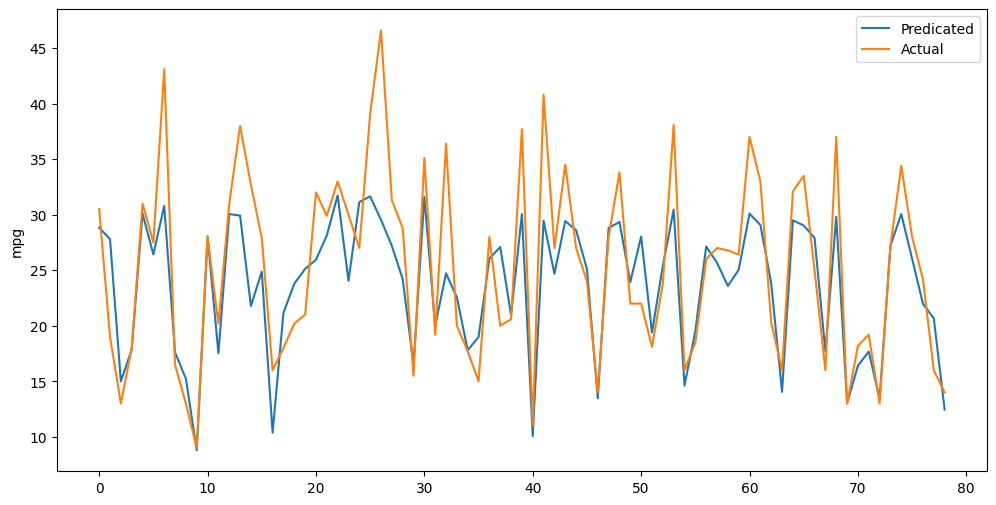

In [18]:
from functools import partial

result_dict["mpg - kitchen sink Elastic net"]= build_models(
        partial(elastic_net_regression,alpha=0,equivalent_to="OLS"),
        'mpg',
        ['cylinders','displacement','horsepower','weight','acceleration'],
        automobile_df,
        show_plot_y=True  
)

Equivalent to  Lasso
Training Score : 0.7063135193804211
Testing Score : 0.7065078734582464


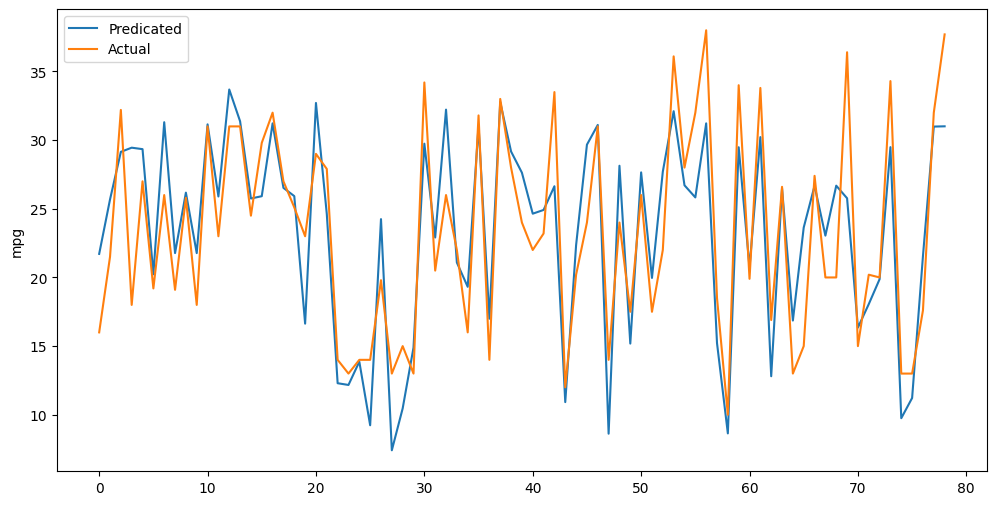

In [19]:
result_dict["mpg - kitchen sink Elastic net lasso"]= build_models(
        partial(elastic_net_regression,alpha=1,l1_ratio=1,equivalent_to="Lasso"),
        'mpg',
        ['cylinders','displacement','horsepower','weight','acceleration'],
        automobile_df,
        show_plot_y=True  
)

In [20]:
compare_results()

Regression mpg - single linear
Training Score 0.672181059745804
Testing Score 0.7539773908755517

Regression mpg - kitchen sink linear
Training Score 0.7114834360429263
Testing Score 0.6752249487259199

Regression mpg - kitchen sink lasso
Training Score 0.6840978469481247
Testing Score 0.7808457281678542

Regression mpg - kitchen sink Ridge
Training Score 0.7116268537169443
Testing Score 0.6888152170393079

Regression mpg - kitchen sink Elastic net
Training Score 0.7063020223162144
Testing Score 0.6793867258962282

Regression mpg - kitchen sink Elastic net lasso
Training Score 0.7063135193804211
Testing Score 0.7065078734582464



## SVR

In [21]:
def svr_reg(x_train,y_train,kernal='linear', epsilon=0.05,C=0.3):
    return SVR(kernel=kernal,epsilon=epsilon,C=C).fit(x_train,y_train)

Training Score : 0.7052721641143938
Testing Score : 0.6753167156510669


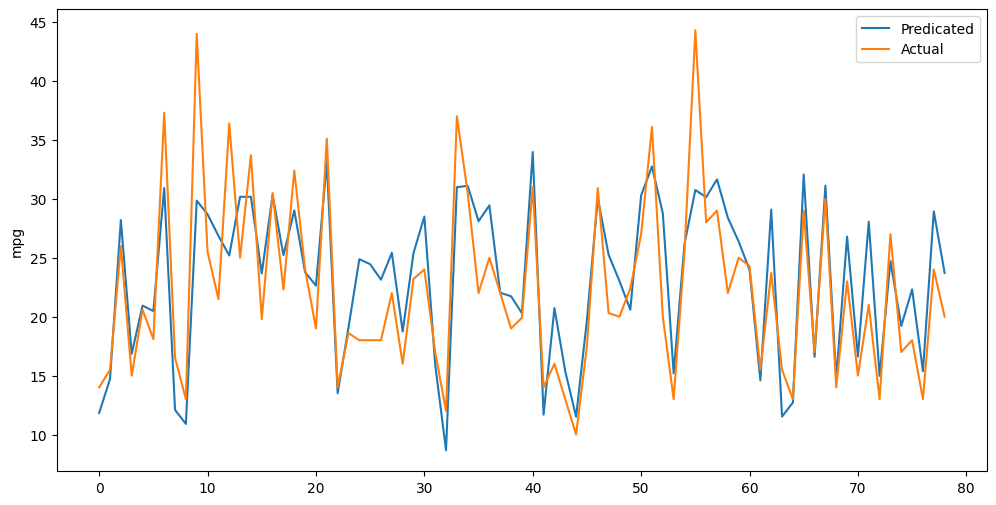

In [22]:
result_dict["mpg - kitchen sink SVR"]= build_models(
    svr_reg,
    'mpg',
    ['cylinders','displacement','horsepower','weight','acceleration'],
    automobile_df,
    show_plot_y=True
    
)

In [23]:
compare_results()

Regression mpg - single linear
Training Score 0.672181059745804
Testing Score 0.7539773908755517

Regression mpg - kitchen sink linear
Training Score 0.7114834360429263
Testing Score 0.6752249487259199

Regression mpg - kitchen sink lasso
Training Score 0.6840978469481247
Testing Score 0.7808457281678542

Regression mpg - kitchen sink Ridge
Training Score 0.7116268537169443
Testing Score 0.6888152170393079

Regression mpg - kitchen sink Elastic net
Training Score 0.7063020223162144
Testing Score 0.6793867258962282

Regression mpg - kitchen sink Elastic net lasso
Training Score 0.7063135193804211
Testing Score 0.7065078734582464

Regression mpg - kitchen sink SVR
Training Score 0.7052721641143938
Testing Score 0.6753167156510669



## K-Nearset Neighbors Regressions

In [24]:
def kneighborsr_regression(x_train,y_train,n_neighbors=15):
    return KNeighborsRegressor(n_neighbors=n_neighbors).fit(x_train,y_train)


Training Score : 0.7639521358923638
Testing Score : 0.6476020432773972


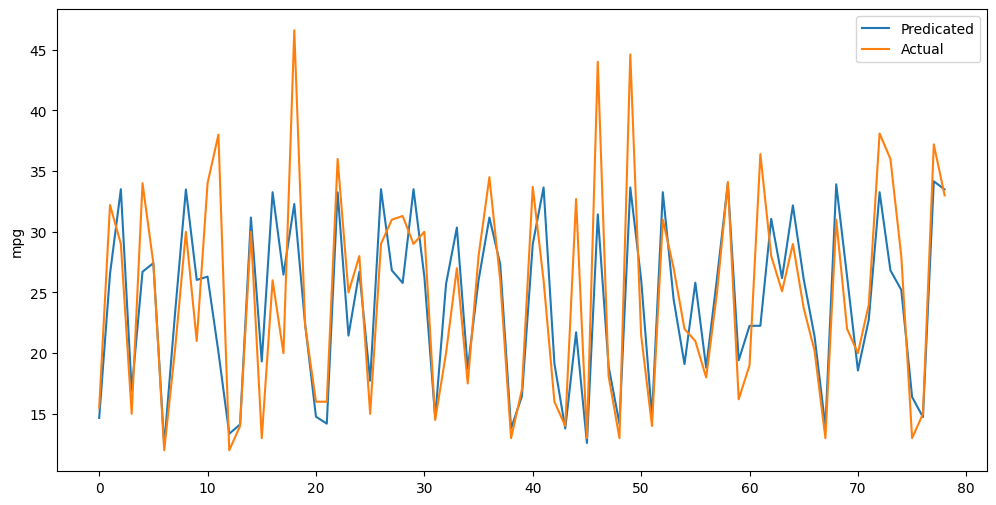

In [25]:
result_dict['mpg - kitchen sink K-nn']= build_models(kneighborsr_regression,
                                                    'mpg',
                                                    ['cylinders','displacement','horsepower','weight','acceleration'],
                                                    automobile_df,
                                                    show_plot_y=True)

In [26]:
compare_results()

Regression mpg - single linear
Training Score 0.672181059745804
Testing Score 0.7539773908755517

Regression mpg - kitchen sink linear
Training Score 0.7114834360429263
Testing Score 0.6752249487259199

Regression mpg - kitchen sink lasso
Training Score 0.6840978469481247
Testing Score 0.7808457281678542

Regression mpg - kitchen sink Ridge
Training Score 0.7116268537169443
Testing Score 0.6888152170393079

Regression mpg - kitchen sink Elastic net
Training Score 0.7063020223162144
Testing Score 0.6793867258962282

Regression mpg - kitchen sink Elastic net lasso
Training Score 0.7063135193804211
Testing Score 0.7065078734582464

Regression mpg - kitchen sink SVR
Training Score 0.7052721641143938
Testing Score 0.6753167156510669

Regression mpg - kitchen sink K-nn
Training Score 0.7639521358923638
Testing Score 0.6476020432773972



## SGD Regression 

In [28]:
def apply_standard_scaler(x):
    scaller= StandardScaler()
    scaller.fit(x)
    return scaller.transform(x)

In [32]:
def seg_reg(x_train,y_train,max_iter=10000,tol=1e-3):
    return SGDRegressor(max_iter=max_iter,tol=tol).fit(x_train,y_train)

Training Score : 0.7135758242837091
Testing Score : 0.6603018392466546


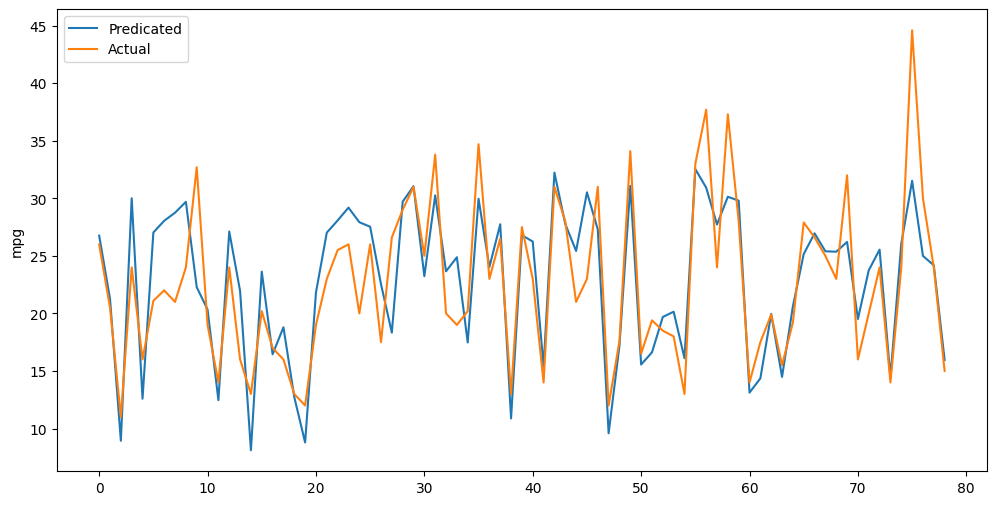

In [33]:
result_dict['mpg - kitchen sink SGD']= build_models(seg_reg,
                                                    'mpg',
                                                     ['cylinders','displacement','horsepower','weight','acceleration'],
                                                    automobile_df,
                                                    preprocess_fn=apply_standard_scaler,
                                                    show_plot_y=True
                                                    )

## Decision tree Regression

In [34]:
def decision_tree_reg(x_train,y_train,max_depth=2):
    return DecisionTreeRegressor(max_depth=max_depth).fit(x_train,y_train)


Training Score : 0.7325671769596711
Testing Score : 0.6640048997322515


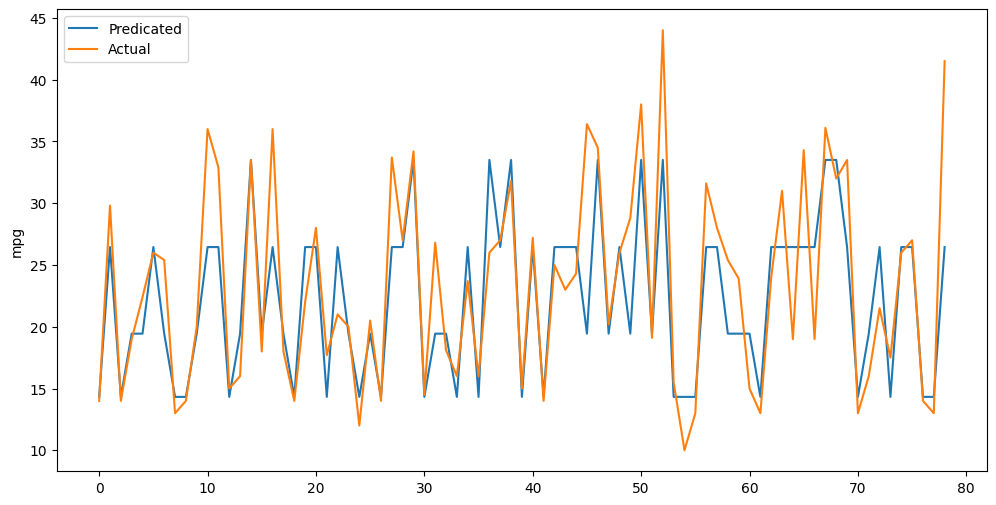

In [35]:
result_dict['mpg - kitchen sink DescitionTree']= build_models(decision_tree_reg,
                                                    'mpg',
                                                     ['cylinders','displacement','horsepower','weight','acceleration'],
                                                    automobile_df,
                                                    preprocess_fn=apply_standard_scaler,
                                                    show_plot_y=True
                                                    )

In [36]:
def lars_reg(x_train,y_train, n_nonzeros_coefs=4):
    return Lars(n_nonzero_coefs=n_nonzeros_coefs).fit(x_train,y_train)

Training Score : 0.6999625214428152
Testing Score : 0.7342032978750006


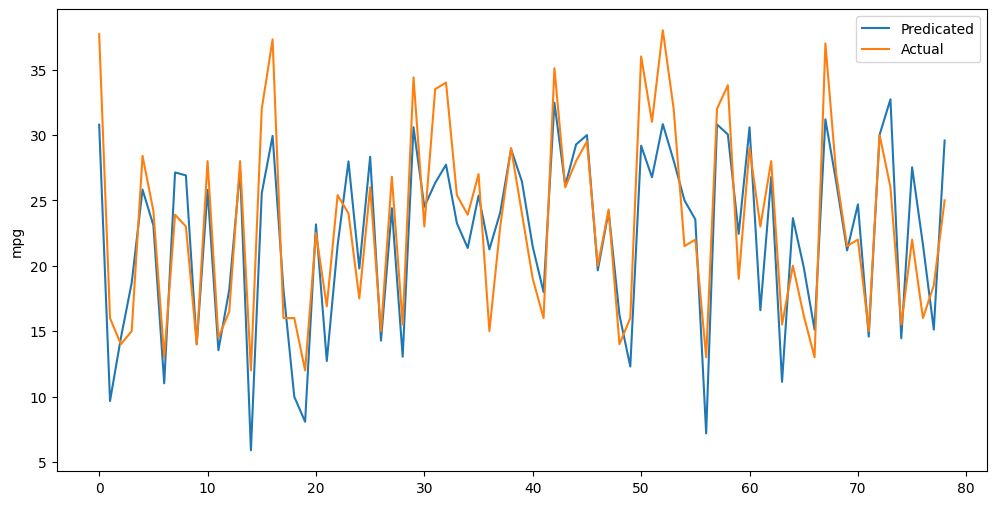

In [37]:
result_dict['mpg - kitchen sink Lars']= build_models(lars_reg,
                                                    'mpg',
                                                     ['cylinders','displacement','horsepower','weight','acceleration'],
                                                    automobile_df,
                                                    show_plot_y=True
                                                    )